# Machine Learning sem 5 Practical File

### Karthik Nair, 5EA, 00229802021

#### 1. Extract the data from the database using python

In [1]:
# extract 0BostonHousing and store in a dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib

dataframe0 = pd.read_csv(os.path.join(os.getcwd(),'datasets', 'BostonHousing.csv'))
dataframe0.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### 2. Write a program to implement linear and logistic regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings


linear_features = dataframe0.drop('medv', axis=1)
linear_target = dataframe0['medv']

logistic_features = dataframe0.drop('chas', axis=1)
logistic_target = dataframe0['chas']

linear_features_train, linear_features_test, linear_target_train, linear_target_test = train_test_split(
    linear_features, linear_target, test_size=0.2, random_state=42
)

logistic_features_train, logistic_features_test, logistic_target_train, logistic_target_test = train_test_split(
    logistic_features, logistic_target, test_size=0.2, random_state=42
)

scaler = StandardScaler()
linear_features_train_scaled = scaler.fit_transform(linear_features_train)
linear_features_test_scaled = scaler.transform(linear_features_test)

linear_model = LinearRegression()
linear_model.fit(linear_features_train_scaled, linear_target_train)

linear_predictions = linear_model.predict(linear_features_test_scaled)

linear_mse = mean_squared_error(linear_target_test, linear_predictions)
print(f"Linear Regression Mean Squared Error: {linear_mse}")

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    
    logistic_scaler = StandardScaler()
    logistic_features_train_scaled = logistic_scaler.fit_transform(logistic_features_train)
    logistic_features_test_scaled = logistic_scaler.transform(logistic_features_test)

    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(logistic_features_train_scaled, logistic_target_train)

logistic_predictions = logistic_model.predict(logistic_features_test_scaled)

logistic_accuracy = accuracy_score(logistic_target_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

Linear Regression Mean Squared Error: 24.29111947497352
Logistic Regression Accuracy: 0.9411764705882353


#### 3. Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a CSV file. Compute the accuracy of the classifier, considering few test data sets.

a. naïve Bayesian classifier On BostonHousing dataset

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

dataframe0 = pd.read_csv(os.path.join(os.getcwd(),'datasets', 'BostonHousing.csv'))

dataframe0['target'] = (dataframe0['medv'] > dataframe0['medv'].median()).astype(int)
dataframe0 = dataframe0.drop('medv', axis=1)

X = dataframe0.drop('target', axis=1)
y = dataframe0['target']

label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Classifier Accuracy: {accuracy}")

Naive Bayes Classifier Accuracy: 0.7647058823529411


b. naïve Bayesian classifier on adult dataset ("Census Income" dataset)

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

dataframe1 = pd.read_csv(os.path.join(os.getcwd(),'datasets', 'adult.csv'))
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
dataframe1.columns = col_names
dataframe1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
label_encoder = LabelEncoder()
for col in dataframe1.columns:
    if dataframe1[col].dtype == 'object':
        dataframe1[col] = label_encoder.fit_transform(dataframe1[col])

X = dataframe1.drop('income', axis=1)
y = dataframe1['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes classifier: {accuracy:.2f}")

Accuracy of the Naive Bayes classifier: 0.80


#### 4. Write a program to implement k-nearest neighbors (KNN) and Support Vector Machine (SVM) Algorithm for classification

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

dataframe1 = pd.read_csv(os.path.join("datasets", "adult.csv"), names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                                             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

label_encoder = LabelEncoder()
for col in dataframe1.columns:
    if dataframe1[col].dtype == 'object':
        dataframe1[col] = label_encoder.fit_transform(dataframe1[col])

X = dataframe1.drop('income', axis=1)
y = dataframe1['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of KNN classifier: {accuracy_knn:.2f}")

svm_classifier = make_pipeline(StandardScaler(), SVC())
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM classifier: {accuracy_svm:.2f}")

Accuracy of KNN classifier: 0.78
Accuracy of SVM classifier: 0.85


#### 5. Implement classification of a given dataset using random forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

dataframe1 = pd.read_csv(os.path.join("datasets","adult.csv"), names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                                             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

label_encoder = LabelEncoder()
for col in dataframe1.columns:
    if dataframe1[col].dtype == 'object':
        dataframe1[col] = label_encoder.fit_transform(dataframe1[col])

X = dataframe1.drop('income', axis=1)
y = dataframe1['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

y_pred = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest classifier: {accuracy:.2f}")

Accuracy of Random Forest classifier: 0.86


#### 6. Build an Artificial Neural Network (ANN) by implementing the Back propagation algorithm and test the same using appropriate data sets.

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf

dataframe2 = pd.read_csv(os.path.join('datasets', 'Churn_Modelling.csv'))
dataframe2 = dataframe2.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataframe2 = pd.get_dummies(dataframe2, columns=['Geography', 'Gender'], drop_first=True)

X = dataframe2.drop('Exited', axis=1)
y = dataframe2['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
# y_pred = model.predict_classes(X_test)

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Test Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


2023-12-01 01:49:39.125608: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 01:49:39.147133: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
225/225 [==============================] - 0s 926us/step - loss: 0.4961 - accuracy: 0.7749 - val_loss: 0.4089 - val_accuracy: 0.8288
Epoch 2/10
225/225 [==============================] - 0s 578us/step - loss: 0.4184 - accuracy: 0.8200 - val_loss: 0.3853 - val_accuracy: 0.8525
Epoch 3/10
225/225 [==============================] - 0s 575us/step - loss: 0.3961 - accuracy: 0.8347 - val_loss: 0.3684 - val_accuracy: 0.8550
Epoch 4/10
225/225 [==============================] - 0s 589us/step - loss: 0.3762 - accuracy: 0.8450 - val_loss: 0.3580 - val_accuracy: 0.8537
Epoch 5/10
225/225 [==============================] - 0s 562us/step - loss: 0.3635 - accuracy: 0.8497 - val_loss: 0.3475 - val_accuracy: 0.8537
Epoch 6/10
225/225 [==============================] - 0s 514us/step - loss: 0.3554 - accuracy: 0.8553 - val_loss: 0.3436 - val_accuracy: 0.8612
Epoch 7/10
225/225 [==============================] - 0s 548us/step - loss: 0.3503 - accuracy: 0.8589 - val_loss: 0.3411 - val_accuracy:

#### 7. Apply k-Means algorithm k-Means algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using the heirarcial clustering. Compare the results of these two algorithms and comment on the quality of clustering. You can add Python ML library classes in the program.

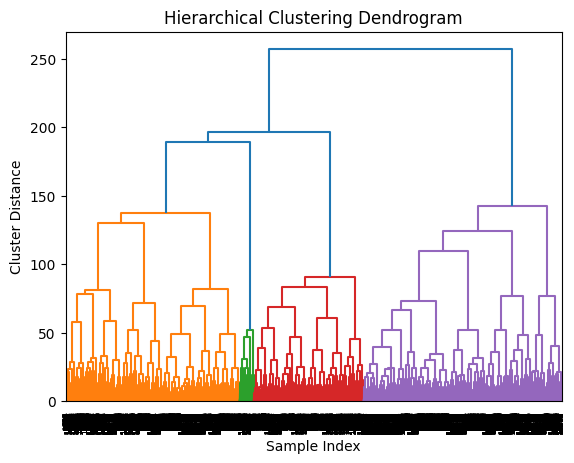

K-Means Silhouette Score: 0.1617
Hierarchical Silhouette Score: 0.1179


In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

dataset_path = os.path.join('datasets', 'bike-share.csv')
dataframe3 = pd.read_csv(dataset_path)
numeric_cols = dataframe3.drop(['instant', 'dteday'], axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_cols)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(data_scaled)
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
agg_silhouette = silhouette_score(data_scaled, agg_labels)
linked = linkage(data_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

print(f'K-Means Silhouette Score: {kmeans_silhouette:.4f}')
print(f'Hierarchical Silhouette Score: {agg_silhouette:.4f}')

#### 8. Write a program to implement Self-Organizing Map (SOM)

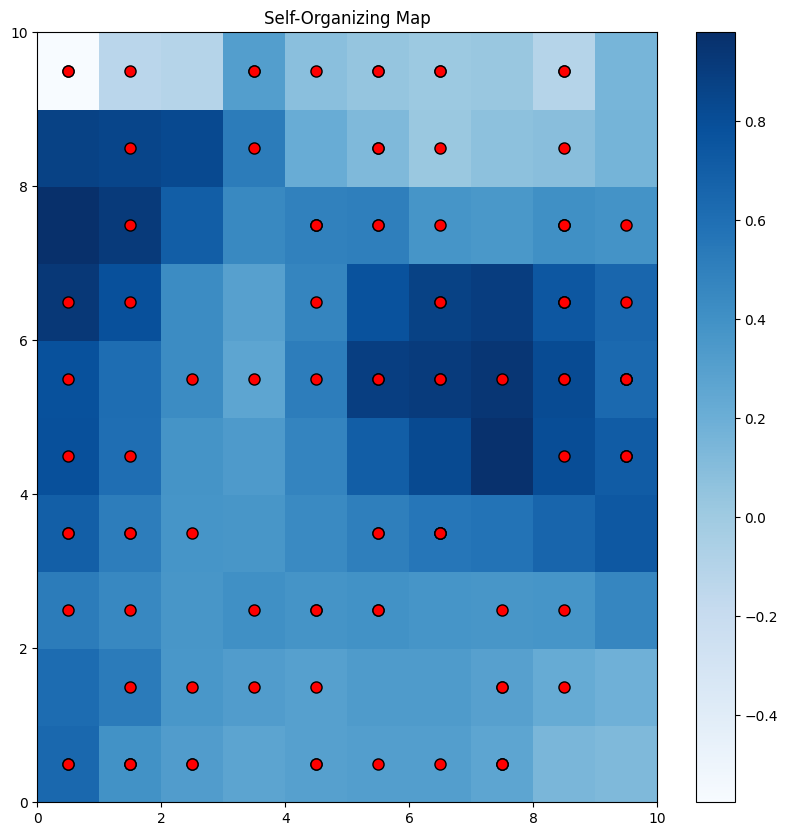

In [10]:
from minisom import MiniSom

np.random.seed(42)
data = np.random.rand(100, 2)  # 100 samples with 2 features

data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

som_size = (10, 10)  # SOM grid size
learning_rate = 0.5
sigma = 1.0

som = MiniSom(som_size[0], som_size[1], data.shape[1], sigma=sigma, learning_rate=learning_rate)
som.train_random(data, 1000)  
weights = som.get_weights()
winning_neurons = np.array([som.winner(x) for x in data])

plt.figure(figsize=(10, 10))
plt.pcolor(weights[:, :, 0], cmap='Blues')  # Display the first feature of the weights
plt.colorbar()

for i, j in winning_neurons:
    plt.plot(i + 0.5, j + 0.5, 'ro', markeredgecolor='k', markersize=8)

plt.title('Self-Organizing Map')
plt.show()


#### 9. Write a program for empirical comparison of different supervised learning algorithms

Decision Tree Accuracy: 0.9444
SVM Accuracy: 0.8056
Random Forest Accuracy: 1.0000


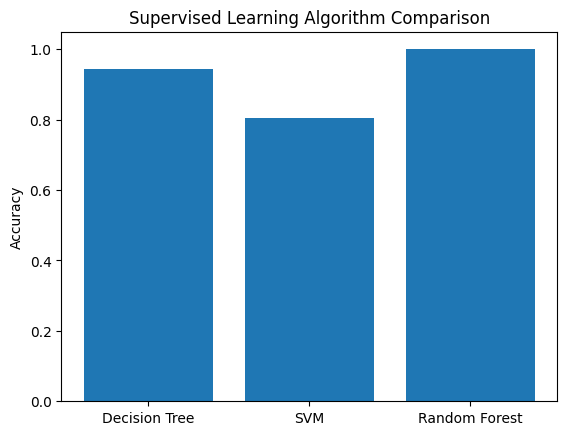

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.4f}')

fig, ax = plt.subplots()
ax.bar(results.keys(), results.values())
ax.set_ylabel('Accuracy')
ax.set_title('Supervised Learning Algorithm Comparison')
plt.show()


#### 10. Write a program for empirical comparison of different unsupervised learning algorithms

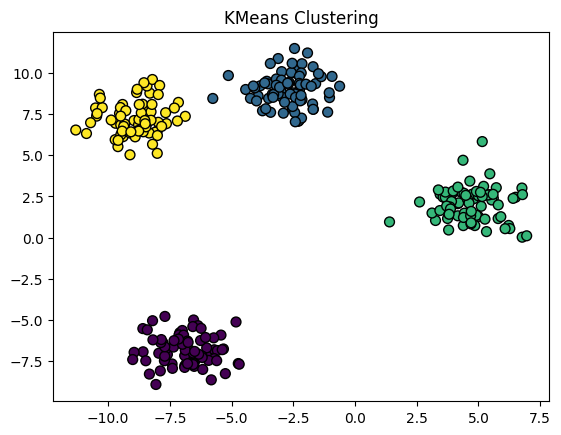

KMeans Silhouette Score: 0.792



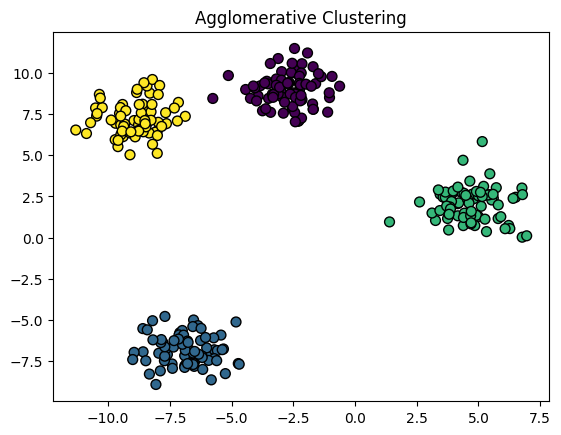

Agglomerative Silhouette Score: 0.792



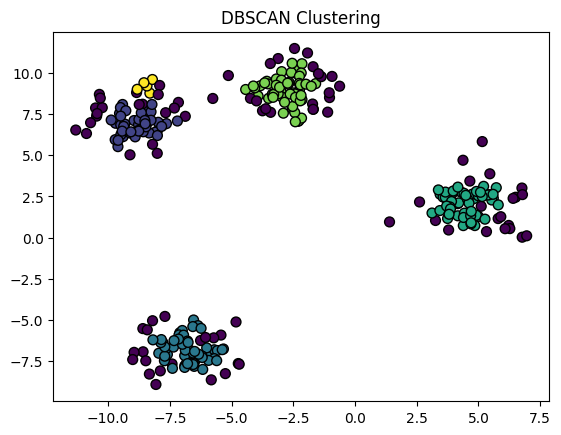

DBSCAN Silhouette Score: 0.325



In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=4, random_state=42) # Generate some data

algorithms = {
    'KMeans': KMeans(n_clusters=4),
    'Agglomerative': AgglomerativeClustering(n_clusters=4),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

for name, algorithm in algorithms.items():
    algorithm.fit(X)
    labels = algorithm.labels_

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f'{name} Clustering')
    plt.show()

    silhouette_avg = silhouette_score(X, labels)
    print(f'{name} Silhouette Score: {silhouette_avg:.3f}\n')


#### 11. Write a program to build Decision Trees using i) Information Gain, and ii) Gini Index methods using the appropriate dataset. Visualize the trees and compare all the performance metrics.

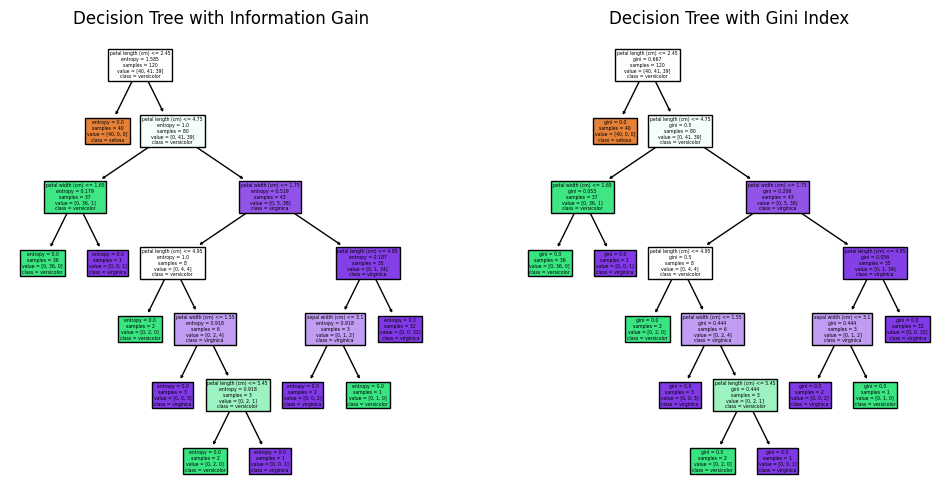

Decision Tree with Information Gain:
Accuracy: 1.000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree with Gini Index:
Accuracy: 1.000
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_info_gain = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_info_gain.fit(X_train, y_train)

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_tree(dt_info_gain, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree with Information Gain')

plt.subplot(1, 2, 2)
plot_tree(dt_gini, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree with Gini Index')

plt.show()

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=iris.target_names)
    return accuracy, report

accuracy_info_gain, report_info_gain = evaluate_model(dt_info_gain, X_test, y_test)
print("Decision Tree with Information Gain:")
print(f"Accuracy: {accuracy_info_gain:.3f}")
print("Classification Report:\n", report_info_gain)

accuracy_gini, report_gini = evaluate_model(dt_gini, X_test, y_test)
print("\nDecision Tree with Gini Index:")
print(f"Accuracy: {accuracy_gini:.3f}")
print("Classification Report:\n", report_gini)


#### 12. Implement all the steps of Data Preprocessing on the appropriate dataset. Include handling missing data, encoding categorical data, and feature scaling in addition to the basic steps.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_csv("datasets/train.csv")

print("Initial Dataset:")
print(df.head())

columns_with_missing = df.columns[df.isnull().any()].tolist()

print("\nStep 1: Handling Missing Data")
print("Columns with Missing Values:", columns_with_missing)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

numerical_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')  # You can also use a constant value or a different strategy
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

print("Missing Values Imputed.")
print(df.head())

print("\nStep 2: Encoding Categorical Data")
print("Categorical Columns:", categorical_columns)

encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))
df_encoded.columns = encoder.get_feature_names_out(categorical_columns)

df = pd.concat([df, df_encoded], axis=1)
df = df.drop(categorical_columns, axis=1)

print("Categorical Data Encoded.")
print(df.head())

print("\nStep 3: Feature Scaling")
print("Numerical Columns for Scaling:", numerical_columns)

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Numerical Features Scaled.")
print(df.head())

X = df.drop("SalePrice", axis=1)  # Features
y = df["SalePrice"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nStep 4: Dataset Splitting")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Initial Dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   